# Principal Component Analysis with Cancer Data

In [45]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [46]:
data_df = pd.read_csv('Cancer.csv')

In [47]:
data_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [48]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [49]:
data_df.shape

(699, 11)

In [50]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


###### We have 11 columns in total with all non-null values and all attributes should be numerical per data description. However we see that out of all the columns registered as INT datatype, only 'Bare Nuclei' has Object Datatype. This means that there seems to some erroneous entries witin the column. Let's dig deeper for inspection.

In [51]:
data_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [52]:
data_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [53]:
data_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [54]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [55]:
data_df[data_df['Bare Nuclei'] == '?'].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [56]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [57]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [58]:
data_df['Bare Nuclei'].mode()[0]

'1'

In [59]:
data_df['Bare Nuclei'].replace('?','1',inplace=True)
# replacing '?' with the mode value

In [60]:
data_df['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [61]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].astype("int64")
# converting Bare Nuclei to int datatype after data imputation.

In [62]:
data_df.dtypes
# confirming datatype change

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [63]:
data_df[data_df.duplicated()]
# checking for duplicate records

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [64]:
len(data_df)

699

In [65]:
data_df.drop_duplicates(subset = None, keep = 'first', inplace = True)
# removing the duplicates

In [66]:
len(data_df)

690

In [67]:
data_df.tail()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [68]:
data_df.reset_index(drop = True, inplace = True)

In [69]:
data_df.tail()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
685,776715,3,1,1,1,3,2,1,1,1,2
686,841769,2,1,1,1,2,1,1,1,1,2
687,888820,5,10,10,3,7,3,8,10,2,4
688,897471,4,8,6,4,3,4,10,6,1,4
689,897471,4,8,8,5,4,5,10,4,1,4


In [71]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,690.0,1.073826e+06,619609.221048,61634.0,874484.5,1171752.5,1238450.5,13454352.0
ClumpThickness,690.0,4.428986e+00,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333e+00,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348e+00,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.827536e+00,2.867787,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,690.0,3.213043e+00,2.200964,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,690.0,3.482609e+00,3.617064,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,690.0,3.436232e+00,2.444060,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,690.0,2.885507e+00,3.067682,1.0,1.0,1.0,4.0,10.0
Mitoses,690.0,1.594203e+00,1.724230,1.0,1.0,1.0,1.0,10.0


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variables

In [72]:
data_df.iloc[:,1:].corr().round(2)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.00,0.64,0.65,0.49,0.52,0.59,0.56,0.54,0.35,0.72
Cell Size,0.64,1.00,0.91,0.71,0.75,0.68,0.76,0.73,0.46,0.82
Cell Shape,0.65,0.91,1.00,0.69,0.71,0.70,0.74,0.72,0.44,0.82
Marginal Adhesion,0.49,0.71,0.69,1.00,0.61,0.67,0.67,0.60,0.42,0.70
Single Epithelial Cell Size,0.52,0.75,0.71,0.61,1.00,0.58,0.62,0.63,0.48,0.68
Bare Nuclei,0.59,0.68,0.70,0.67,0.58,1.00,0.67,0.58,0.34,0.82
Normal Nucleoli,0.56,0.76,0.74,0.67,0.62,0.67,1.00,0.67,0.34,0.76
Bland Chromatin,0.54,0.73,0.72,0.60,0.63,0.58,0.67,1.00,0.43,0.72
Mitoses,0.35,0.46,0.44,0.42,0.48,0.34,0.34,0.43,1.00,0.42
Class,0.72,0.82,0.82,0.70,0.68,0.82,0.76,0.72,0.42,1.00


In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [ ]:
#Let us check the pair plot

C:\Users\TuryansuSubhadarshy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\TuryansuSubhadarshy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


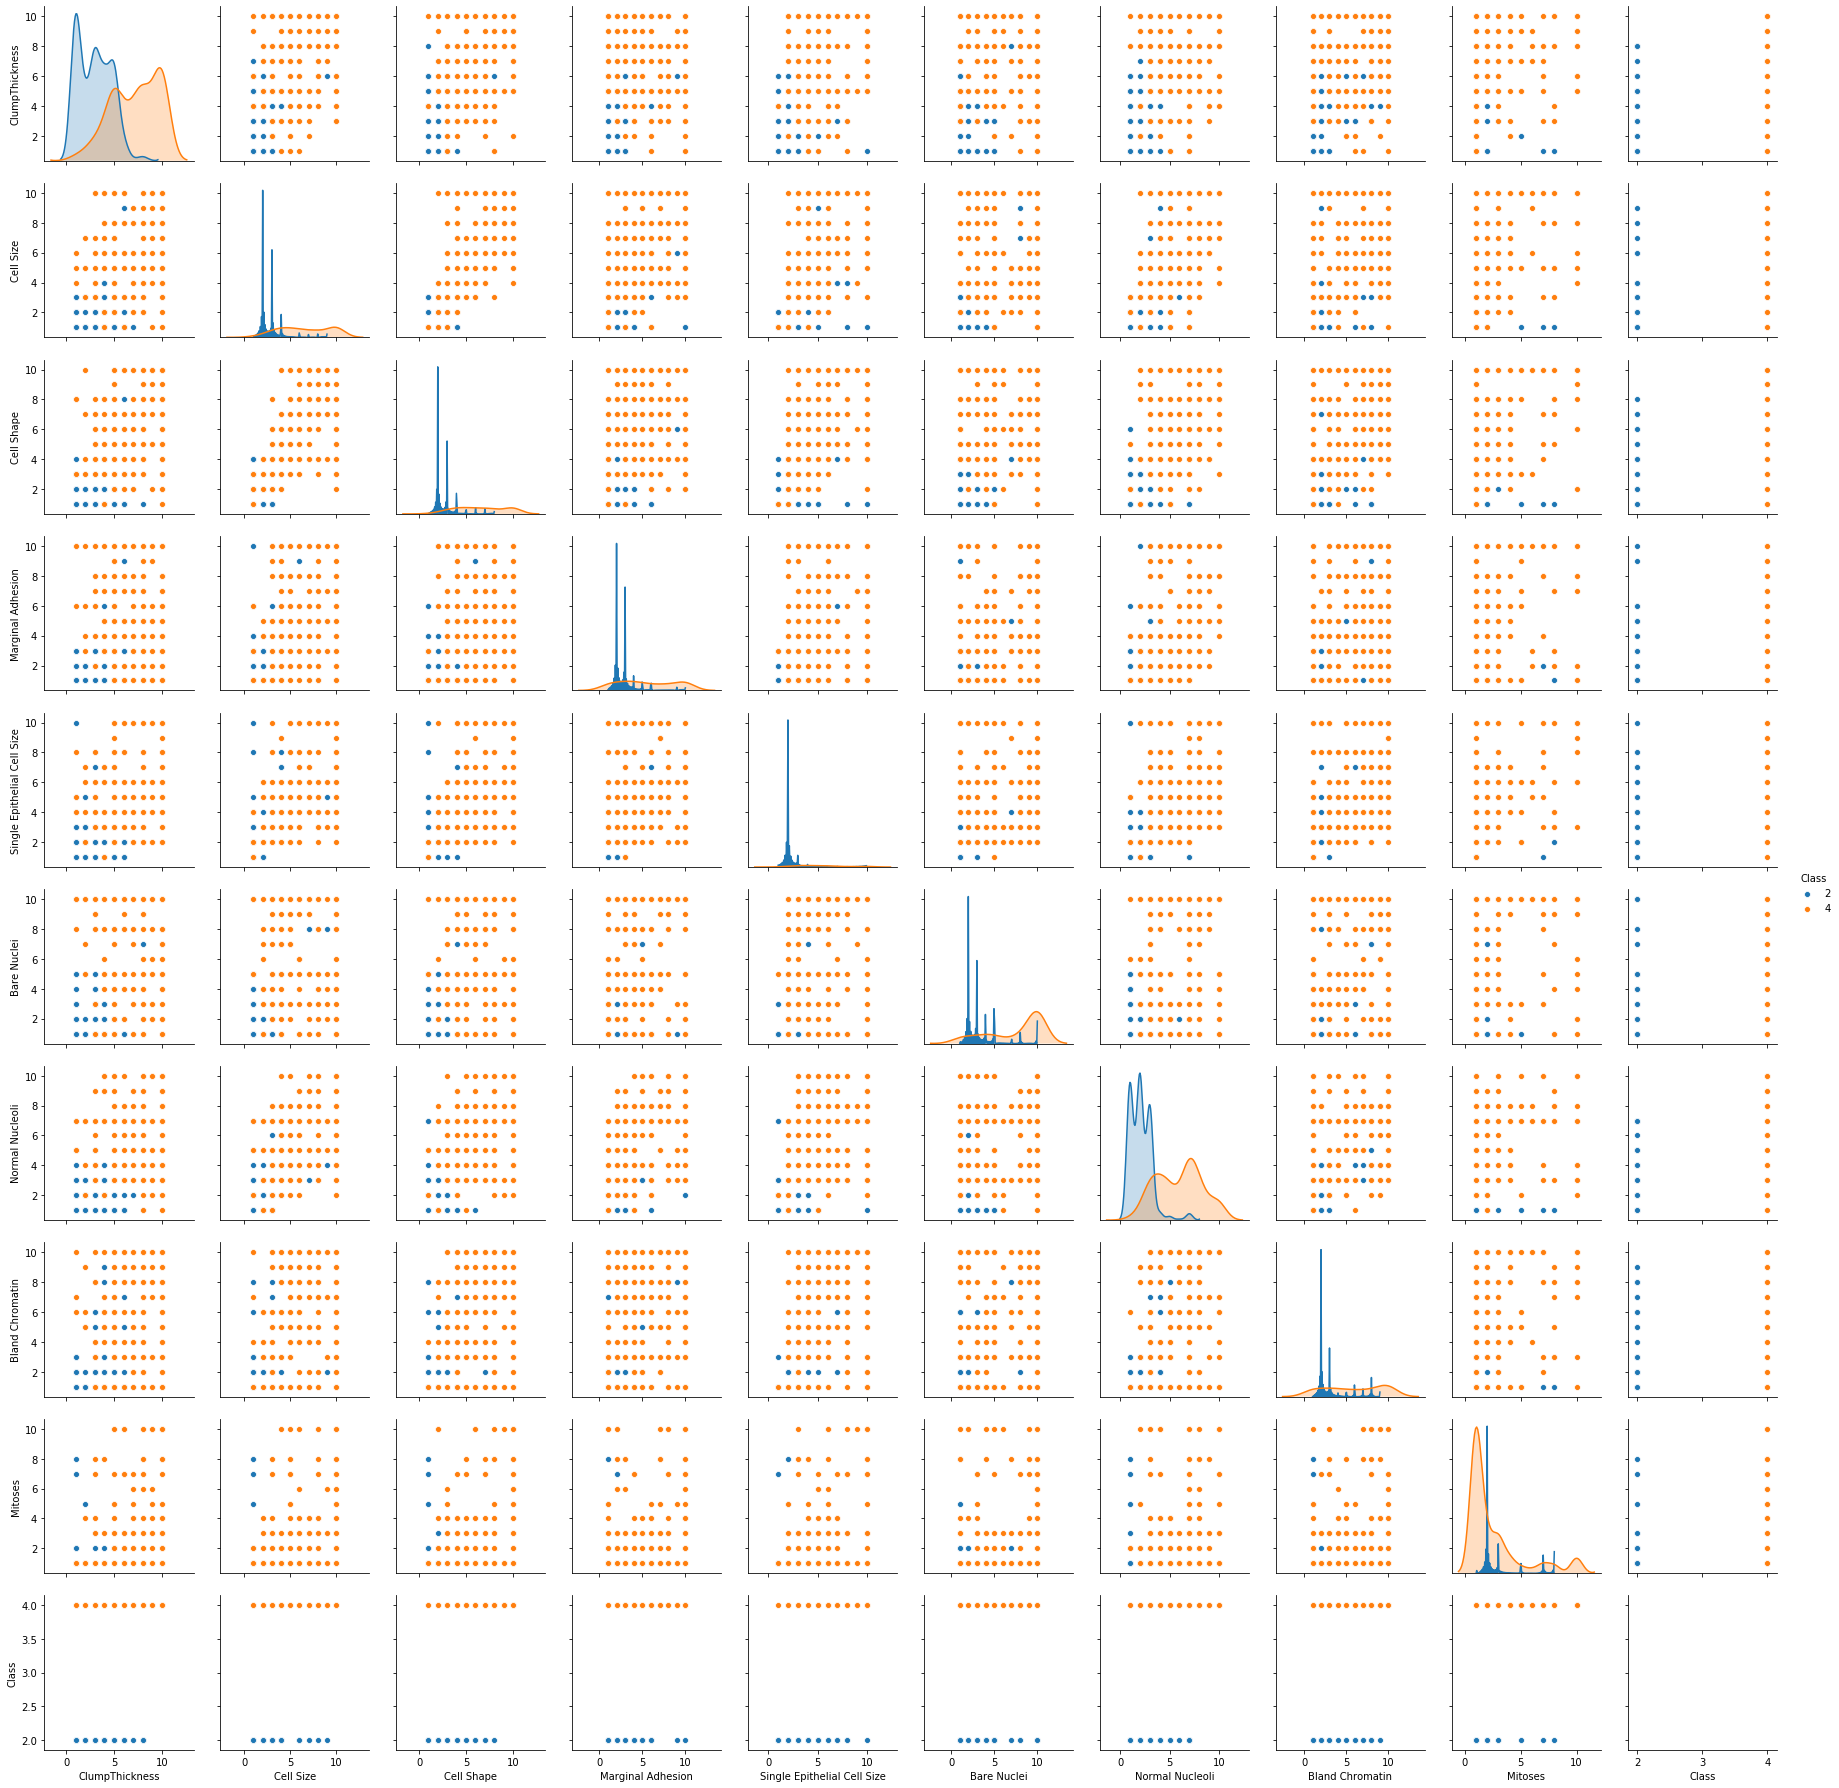

In [73]:
sns.pairplot(data_df.iloc[:,1:], diag_kind='kde', hue = 'Class')

In [74]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [75]:
data_df.iloc[:,1:].skew()
# checking for skewness

ClumpThickness                 0.589388
Cell Size                      1.231117
Cell Shape                     1.161618
Marginal Adhesion              1.505407
Single Epithelial Cell Size    1.716780
Bare Nuclei                    1.029146
Normal Nucleoli                1.101266
Bland Chromatin                1.405287
Mitoses                        3.541474
Class                          0.653886
dtype: float64

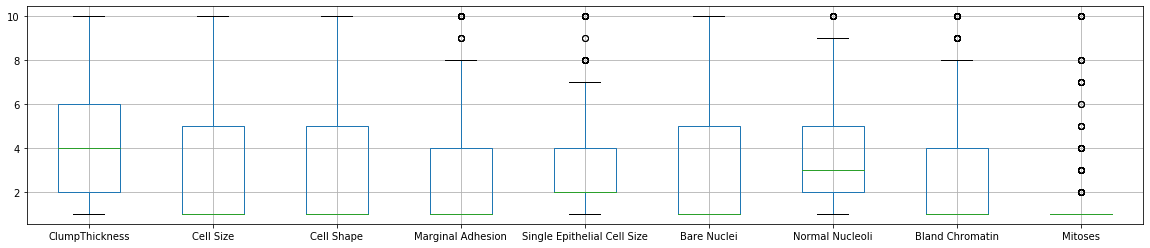

In [76]:
data_df.iloc[:,1:-1].boxplot(figsize = (20,4))

In [77]:
data_df_copy = data_df.copy()

In [78]:
pd.crosstab(data_df['Marginal Adhesion'],data_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [79]:
data_df_copy['Marginal Adhesion'] = np.where(data_df['Marginal Adhesion'] >4,4, data_df['Marginal Adhesion'])

In [80]:
data_df_copy['Marginal Adhesion'].value_counts()

1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [81]:
pd.crosstab(data_df['Single Epithelial Cell Size'], data_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [82]:
data_df['Single Epithelial Cell Size'] = np.where(data_df['Single Epithelial Cell Size'] >3,3, data_df['Single Epithelial Cell Size'])

In [83]:
data_df_copy['Single Epithelial Cell Size'].value_counts()

2     382
3      71
4      48
1      45
6      41
5      39
10     30
8      20
7      12
9       2
Name: Single Epithelial Cell Size, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x18f2ad10>,
 'caps': [<matplotlib.lines.Line2D at 0x18ef09d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f2a810>],
 'medians': [<matplotlib.lines.Line2D at 0x18fb1f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f18bf0>],
 'means': []}

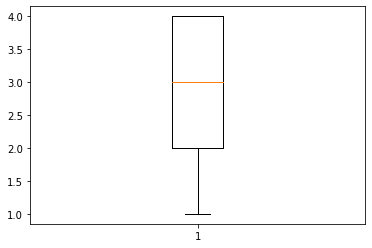

In [84]:
plt.boxplot(np.where(data_df["Normal Nucleoli"] >4, 4, data_df["Normal Nucleoli"]))

In [85]:
data_df_copy['Normal Nucleoli'] = np.where(data_df['Normal Nucleoli'] >3,3, data_df['Normal Nucleoli'])

In [86]:
pd.crosstab(data_df['Mitoses'], data_df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [87]:
data_df_copy['Mitoses'] = np.where(data_df['Mitoses'] >3,3,data_df['Mitoses'])

In [88]:
pd.crosstab(data_df["Bland Chromatin"], data_df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [89]:
data_df_copy['Bland Chromatin'] = np.where(data_df['Bland Chromatin'] >3,3,data_df['Bland Chromatin'])

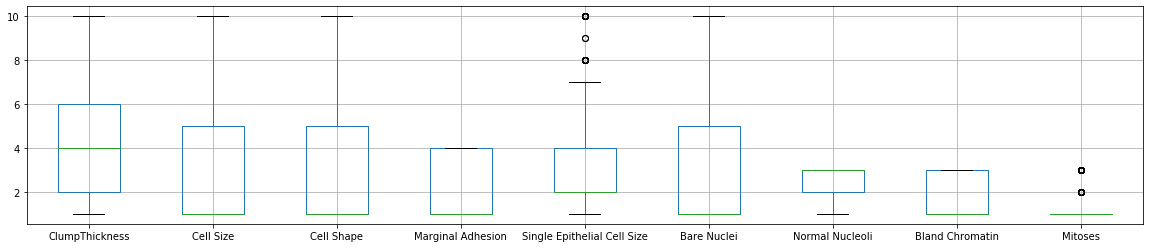

In [90]:
data_df_copy.iloc[:,1:-1].boxplot(figsize = (20,4))

In [ ]:
# We could see most of the outliers are now removed.

In [92]:
data_df_copy = data_df_copy.drop(['ID', 'Class'], axis =1)

In [95]:
from scipy.stats import zscore
data_df_copy = data_df_copy.apply(zscore)
# applying zscore for standardisation

In [96]:
data_df_copy.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.551542,-0.686858,0.835367,-0.742837,-0.438024
1,0.202823,0.285065,0.268920,1.530101,1.721838,1.803153,0.835367,0.343090,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.551542,-0.410190,0.835367,-0.742837,-0.438024
3,0.558020,1.600748,1.620866,-0.781803,-0.096866,0.143146,0.835367,1.429016,-0.438024
4,-0.152375,-0.701698,-0.745040,0.759466,-0.551542,-0.686858,0.835367,-0.742837,-0.438024


# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix


In [98]:
data_df_copy.cov().round(2)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.00,0.64,0.65,0.55,0.52,0.59,0.43,0.58,0.43
Cell Size,0.64,1.00,0.91,0.72,0.75,0.69,0.52,0.71,0.51
Cell Shape,0.65,0.91,1.00,0.70,0.72,0.71,0.51,0.70,0.48
Marginal Adhesion,0.55,0.72,0.70,1.00,0.60,0.70,0.45,0.64,0.42
Single Epithelial Cell Size,0.52,0.75,0.72,0.60,1.00,0.58,0.43,0.61,0.50
Bare Nuclei,0.59,0.69,0.71,0.70,0.58,1.00,0.49,0.63,0.45
Normal Nucleoli,0.43,0.52,0.51,0.45,0.43,0.49,1.00,0.53,0.29
Bland Chromatin,0.58,0.71,0.70,0.64,0.61,0.63,0.53,1.00,0.49
Mitoses,0.43,0.51,0.48,0.42,0.50,0.45,0.29,0.49,1.00


In [99]:
cov_matrix = np.cov(data_df_copy.T)

In [100]:
cov_matrix.shape

(9, 9)

In [101]:
cov_matrix

array([[1.00145138, 0.64410677, 0.65453792, 0.55329897, 0.51800374,
        0.59150555, 0.43289607, 0.57634855, 0.42745595],
       [0.64410677, 1.00145138, 0.9066632 , 0.72204998, 0.74806589,
        0.68556472, 0.51514033, 0.70714438, 0.51098944],
       [0.65453792, 0.9066632 , 1.00145138, 0.7042574 , 0.71527957,
        0.70518656, 0.50582456, 0.69759258, 0.48167882],
       [0.55329897, 0.72204998, 0.7042574 , 1.00145138, 0.60001951,
        0.69693138, 0.44834488, 0.63542419, 0.42473633],
       [0.51800374, 0.74806589, 0.71527957, 0.60001951, 1.00145138,
        0.58132945, 0.42638485, 0.61373638, 0.49592062],
       [0.59150555, 0.68556472, 0.70518656, 0.69693138, 0.58132945,
        1.00145138, 0.49184273, 0.63062452, 0.45258904],
       [0.43289607, 0.51514033, 0.50582456, 0.44834488, 0.42638485,
        0.49184273, 1.00145138, 0.52612114, 0.28642862],
       [0.57634855, 0.70714438, 0.69759258, 0.63542419, 0.61373638,
        0.63062452, 0.52612114, 1.00145138, 0.48840486],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [102]:
#cov_matrix * eigen_vector = eigen_value * Identity_Matrix(shape of cov_matrix) * eigen_vector
# A * V = lambda * V
#cov_matrix should be a square matrix

In [103]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [104]:
eig_values

array([5.7010056 , 0.72945122, 0.09081675, 0.60092861, 0.50178289,
       0.44950111, 0.35727865, 0.28395291, 0.29834468])

In [105]:
eig_vectors

array([[-0.3169696 ,  0.02819842,  0.01426901, -0.07428393,  0.80956562,
         0.41322905, -0.04534531, -0.25454476,  0.00307235],
       [-0.38292887, -0.02468815,  0.73096209, -0.19106717, -0.16984019,
         0.20739116, -0.05419809,  0.38002886,  0.25045475],
       [-0.3792674 ,  0.00897055, -0.67267324, -0.22799817, -0.09924745,
         0.19401416, -0.06214493,  0.51475205,  0.18782996],
       [-0.34296398,  0.05859992, -0.05693723, -0.29683549, -0.04054361,
        -0.53262896, -0.02895344, -0.465017  ,  0.53401507],
       [-0.33699236, -0.18167997, -0.06156447, -0.11930549, -0.50019708,
         0.38352692, -0.2002781 , -0.50622007, -0.37648967],
       [-0.34470252,  0.09125416,  0.06981381, -0.12709038,  0.17899537,
        -0.53706993, -0.26894902,  0.21792104, -0.64149848],
       [-0.26606603,  0.66051048, -0.01636396,  0.64719689, -0.12019559,
         0.05029573, -0.20965794, -0.04733325,  0.10310023],
       [-0.34636933,  0.05340889, -0.00371969,  0.11903466, -0

In [106]:
v_0 = eig_vectors[:,0]

In [107]:
v_0

array([-0.3169696 , -0.38292887, -0.3792674 , -0.34296398, -0.33699236,
       -0.34470252, -0.26606603, -0.34636933, -0.26130668])

In [108]:
np.matmul(cov_matrix, v_0)

array([-1.80704549, -2.18307964, -2.16220555, -1.95523958, -1.9211953 ,
       -1.965151  , -1.5168439 , -1.97465349, -1.48971085])

In [109]:
np.matmul(eig_values[0] * np.identity(cov_matrix.shape[0]), v_0)

array([-1.80704549, -2.18307964, -2.16220555, -1.95523958, -1.9211953 ,
       -1.965151  , -1.5168439 , -1.97465349, -1.48971085])

# Q8 Find variance and cumulative variance by each eigen vector

In [110]:
eig_values

array([5.7010056 , 0.72945122, 0.09081675, 0.60092861, 0.50178289,
       0.44950111, 0.35727865, 0.28395291, 0.29834468])

In [111]:
sorted(eig_values, reverse = True)

[5.701005598600354,
 0.7294512213106865,
 0.6009286052378919,
 0.5017828852525935,
 0.4495011062902543,
 0.3572786454890623,
 0.2983446812476789,
 0.28395291178032406,
 0.090816754079976]

In [112]:
tot = sum(eig_values)

In [113]:
tot

9.01306240928882

In [114]:
var_exp = [(i/tot) * 100 for i in sorted(eig_values, reverse = True)]
var_exp

[63.25270301828737,
 8.09326717364031,
 6.667307713508981,
 5.567285151997377,
 4.987218393461922,
 3.9640094483408066,
 3.310136640574088,
 3.1504598424580257,
 1.0076126177311353]

In [115]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 63.25270302,  71.34597019,  78.01327791,  83.58056306,
        88.56778145,  92.5317909 ,  95.84192754,  98.99238738,
       100.        ])

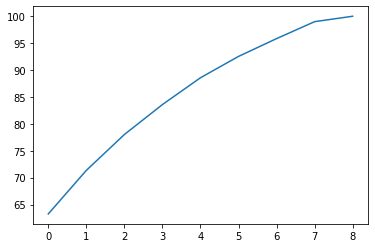

In [116]:
plt.plot(cum_var_exp)

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(n_components=7)

In [120]:
data_reduced = pca.fit_transform(data_df_copy)

In [121]:
data_reduced.transpose()

array([[-1.3272301 ,  2.22864767, -1.45703554, ...,  3.58679234,
         2.06728204,  2.57224702],
       [-0.83439116, -0.82679737, -0.83960625, ...,  0.43568096,
        -1.02730104, -0.97600647],
       [ 0.86547303, -0.69892128,  0.88308211, ..., -0.04779885,
        -0.5208251 , -0.76435288],
       ...,
       [ 0.51666646, -0.83610406,  0.07452069, ...,  1.12903528,
        -0.44219858, -0.28525977],
       [ 0.40628428,  0.7305612 ,  0.44848076, ..., -0.39685512,
        -0.96708142, -0.75960193],
       [-0.08384319,  0.90170111,  0.09582142, ..., -0.79655866,
        -1.09882521, -0.87713035]])

In [122]:
pca.components_

array([[ 0.3169696 ,  0.38292887,  0.3792674 ,  0.34296398,  0.33699236,
         0.34470252,  0.26606603,  0.34636933,  0.26130668],
       [-0.02819842,  0.02468815, -0.00897055, -0.05859992,  0.18167997,
        -0.09125416, -0.66051048, -0.05340889,  0.71736977],
       [-0.07428393, -0.19106717, -0.22799817, -0.29683549, -0.11930549,
        -0.12709038,  0.64719689,  0.11903466,  0.59536706],
       [ 0.80956562, -0.16984019, -0.09924745, -0.04054361, -0.50019708,
         0.17899537, -0.12019559, -0.05458559,  0.06783031],
       [ 0.41322905,  0.20739116,  0.19401416, -0.53262896,  0.38352692,
        -0.53706993,  0.05029573, -0.05280666, -0.15504948],
       [ 0.04534531,  0.05419809,  0.06214493,  0.02895344,  0.2002781 ,
         0.26894902,  0.20965794, -0.90627512,  0.11211663],
       [-0.00307235, -0.25045475, -0.18782996, -0.53401507,  0.37648967,
         0.64149848, -0.10310023,  0.18830462, -0.13212769]])

In [123]:
v_0

array([-0.3169696 , -0.38292887, -0.3792674 , -0.34296398, -0.33699236,
       -0.34470252, -0.26606603, -0.34636933, -0.26130668])

In [124]:
eig_vectors.T

array([[-0.3169696 , -0.38292887, -0.3792674 , -0.34296398, -0.33699236,
        -0.34470252, -0.26606603, -0.34636933, -0.26130668],
       [ 0.02819842, -0.02468815,  0.00897055,  0.05859992, -0.18167997,
         0.09125416,  0.66051048,  0.05340889, -0.71736977],
       [ 0.01426901,  0.73096209, -0.67267324, -0.05693723, -0.06156447,
         0.06981381, -0.01636396, -0.00371969, -0.02852909],
       [-0.07428393, -0.19106717, -0.22799817, -0.29683549, -0.11930549,
        -0.12709038,  0.64719689,  0.11903466,  0.59536706],
       [ 0.80956562, -0.16984019, -0.09924745, -0.04054361, -0.50019708,
         0.17899537, -0.12019559, -0.05458559,  0.06783031],
       [ 0.41322905,  0.20739116,  0.19401416, -0.53262896,  0.38352692,
        -0.53706993,  0.05029573, -0.05280666, -0.15504948],
       [-0.04534531, -0.05419809, -0.06214493, -0.02895344, -0.2002781 ,
        -0.26894902, -0.20965794,  0.90627512, -0.11211663],
       [-0.25454476,  0.38002886,  0.51475205, -0.465017  , -0

In [125]:
pca.explained_variance_

array([5.7010056 , 0.72945122, 0.60092861, 0.50178289, 0.44950111,
       0.35727865, 0.29834468])

In [126]:
eig_values

array([5.7010056 , 0.72945122, 0.09081675, 0.60092861, 0.50178289,
       0.44950111, 0.35727865, 0.28395291, 0.29834468])

# Q10 Find correlation between components and features

In [127]:
comp_df = pd.DataFrame(pca.components_, columns = list(data_df_copy))
comp_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.316970,0.382929,0.379267,0.342964,0.336992,0.344703,0.266066,0.346369,0.261307
1,-0.028198,0.024688,-0.008971,-0.058600,0.181680,-0.091254,-0.660510,-0.053409,0.717370
2,-0.074284,-0.191067,-0.227998,-0.296835,-0.119305,-0.127090,0.647197,0.119035,0.595367
3,0.809566,-0.169840,-0.099247,-0.040544,-0.500197,0.178995,-0.120196,-0.054586,0.067830
4,0.413229,0.207391,0.194014,-0.532629,0.383527,-0.537070,0.050296,-0.052807,-0.155049
5,0.045345,0.054198,0.062145,0.028953,0.200278,0.268949,0.209658,-0.906275,0.112117
6,-0.003072,-0.250455,-0.187830,-0.534015,0.376490,0.641498,-0.103100,0.188305,-0.132128


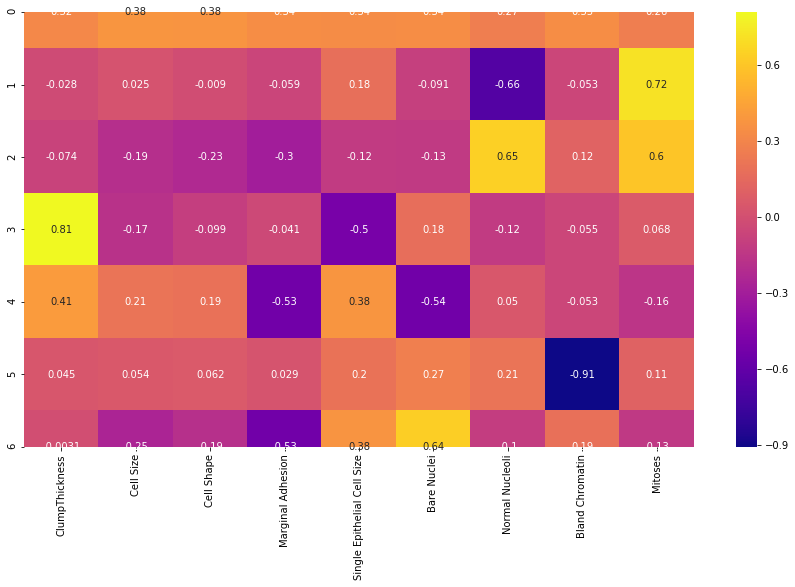

In [128]:
plt.figure(figsize = (15, 8))
sns.heatmap(comp_df, cmap = 'plasma', annot = True)

'Mitoses' has very high correlation (and thus very high impact) on PCA Component 1. All other features have very low impact on Component 1. From the above heatmap we can see 'Clump Thickness' is very high influence (highly inversely correlated) on PCA componenet 2. Component 3 is highly influenced by 'Normal Nucleoli'.

We can infer that if we increase 1 unit of component 3, we expect 0.902 unit decrement of Clump Thickness.
If we increase component 6 by 1 unit, we can expect 0.793 unit increment of Bland Chromatin. Similarly, if we increase component 1 by 1 unit, we can expect 0.78 unit increment of Mitoses and 0.62 unit decrement of Normal Nucleoli. Moreover, if we increase component 2 by 1 unit, we can expect 0.71 unit increment of Normal Nucleoli with 054 unit increment in Mitoses.